In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

import numpy as np
from RetaredHarmonicDynamics import animate_particle
from matplotlib import animation
from scipy.stats import moment,norm
from scipy.special import factorial, lambertw, erf
from pathlib import Path

from matplotlib.colors import LogNorm

tensor = torch.tensor

from my_functions import get_pos, get_mean_std, FokkerPlankCalculator, time_delayed_harmonic, damped_harmonic_oszillator
from my_functions import get_approx_freq,get_zero, get_pos_with_border


In [2]:
x_size = 9
time_size = 4
states = np.array([str(i)+str(j)+str(k)+str(l) for i in range(x_size) for j in range(x_size) for k in range(x_size) for l in range(x_size)])

In [3]:
states

array(['0000', '0001', '0002', ..., '8886', '8887', '8888'], dtype='<U4')

In [4]:
step_prob = {}
def prob(fact, sq2d):
    if fact not in step_prob:
        step_prob[fact] = norm.cdf(fact+(1/2)/sq2d)-norm.cdf(fact-(1/2)/sq2d)
    return step_prob[fact]

In [5]:
step_prob

{}

In [6]:
rates = np.zeros((len(states),len(states)))
tau = 3
w = 0.5
sq2d = 0.5
for i in range(len(rates)):
    for j in range(len(rates[i])):
        from_state = states[j]
        to_state = states[i]
        if from_state[-(time_size - 1):] == to_state[:(time_size - 1)]:
            xf0 = float(from_state[-tau-1]) - (x_size-1)/2
            xft = float(from_state[-1])   - (x_size-1)/2
            xt = float(to_state[-1])      - (x_size-1)/2
            dx = xt-xft
            fact = (dx + w * xf0)/sq2d
            rates[i,j] = prob(fact, sq2d)
                

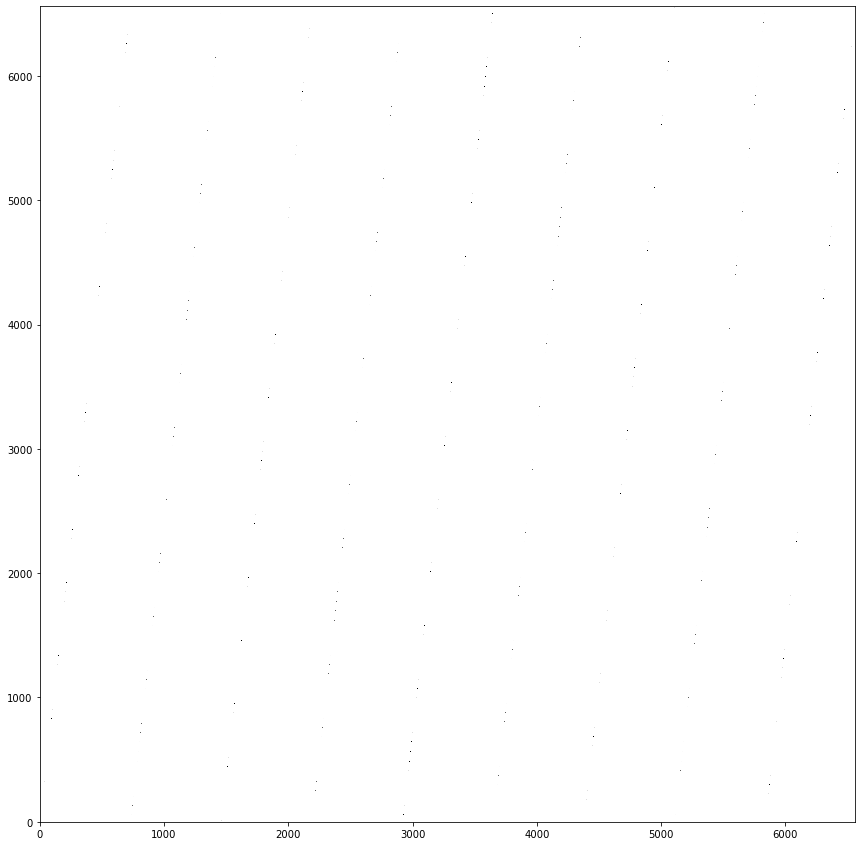

In [7]:
plt.figure(figsize=(15,15))
plt.imshow(rates, interpolation='none',cmap='Greys', origin='lower' )

In [8]:
middle = (x_size-1)//2
start_state_str = str(middle)*time_size
start_state = np.array([0 if o != start_state_str else 1 for o in states])

In [9]:
time_steps = 40
time_states = np.empty((time_steps, start_state.size))
time_states[0] = start_state
for i, state in enumerate(time_states):
    time_states[i+1] = rates@state
    if i == len(time_states)-2:
        break

In [10]:
state_idx = {n:[i for i,o in enumerate(states) if o[-1] == str(n)] for n in range(x_size)}

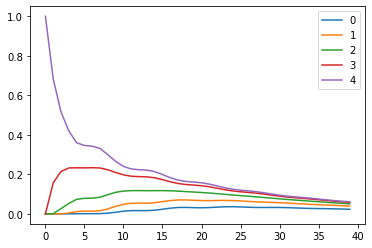

In [11]:
for i in range((x_size+1)//2):
    plt.plot(np.sum(time_states[:,state_idx[i]], axis=-1), label=i)
plt.legend()

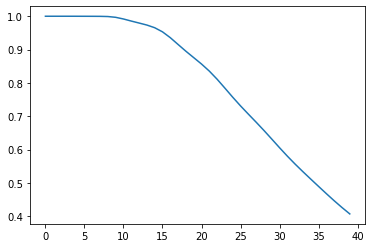

In [12]:
plt.plot(np.sum(time_states, axis=-1))

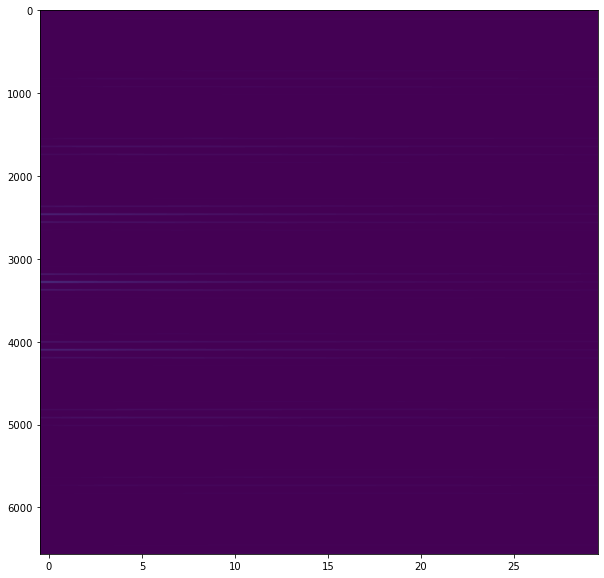

In [13]:
plt.figure(figsize=(10,10), )
plt.imshow(time_states.T[:,10:],aspect='auto')

In [14]:
max_states = [(i,o) for i,o in enumerate(np.sum(time_states[10:], axis=0))]

In [15]:
state_sums_df = pd.DataFrame([ [states[i],o] for i,o in max_states])

In [16]:
state_sums_df.sort_values(1, ascending=False).head(20)

,0,1
3280,4444,0.612035
4100,5555,0.420494
2460,3333,0.420494
2562,3456,0.301538
3998,5432,0.301538
4099,5554,0.290191
2461,3334,0.290191
3371,4555,0.263624
3189,4333,0.263624
4191,5666,0.256223
